<a href="https://colab.research.google.com/github/Jitendra4Jalwaniya/tf_learning/blob/main/random/similarity_search_with_LSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install datasketch

In [58]:
import numpy as np
import cv2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from datasketch import MinHash, MinHashLSH
import os
from matplotlib import pyplot as plt

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# Function to extract SIFT features from an image
def extract_sift_features(image_path, max_features=500):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sift = cv2.SIFT_create(nfeatures=max_features)
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return descriptors

In [61]:
# Convert descriptors into a list of hashable strings
def descriptors_to_strings(descriptors):
    if descriptors is None:
        return []
    return [" ".join(map(str, descriptor)) for descriptor in descriptors]

In [62]:
# Load images and extract features
def load_and_process_images(image_folder):
    image_descriptors = {}
    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        descriptors = extract_sift_features(image_path)
        image_descriptors[image_name] = descriptors_to_strings(descriptors)
    return image_descriptors

In [63]:
# Build LSH index
def build_lsh_index(image_descriptors, num_perm=256):
    lsh = MinHashLSH(threshold=0.3, num_perm=num_perm)  # Lower threshold for more matches
    minhashes = {}

    for image_name, descriptors in image_descriptors.items():
        m = MinHash(num_perm=num_perm)
        for descriptor in descriptors:
            m.update(descriptor.encode('utf8'))
        lsh.insert(image_name, m)
        minhashes[image_name] = m

    return lsh, minhashes

In [64]:
# Query similar images
def query_similar_images(lsh, minhash, image_name):
    return lsh.query(minhash)

In [65]:
# Path to the folder containing images
image_folder = "/content/drive/My Drive/Ooty"

# Step 1: Load and process images
print("Loading and processing images...")
image_descriptors = load_and_process_images(image_folder)

# Step 2: Build LSH index
print("Building LSH index...")
lsh, minhashes = build_lsh_index(image_descriptors)

Loading and processing images...
Building LSH index...


In [66]:
# print(image_descriptors)
print(len(image_descriptors['PXL_20241004_103028444.MP.jpg']))
print(lsh)
print(minhashes)

500
{'PXL_20241004_103028444.MP.jpg': <datasketch.minhash.MinHash object at 0x7e60f3897340>, 'PXL_20241004_103029226.MP.jpg': <datasketch.minhash.MinHash object at 0x7e60f3d24a00>, 'PXL_20241004_103026489.MP.jpg': <datasketch.minhash.MinHash object at 0x7e60f37827d0>, 'PXL_20241004_103006058.MP.jpg': <datasketch.minhash.MinHash object at 0x7e60f37829e0>, 'PXL_20241004_103003465.MP.jpg': <datasketch.minhash.MinHash object at 0x7e60f3782800>, 'PXL_20241004_102955422.MP.jpg': <datasketch.minhash.MinHash object at 0x7e60f37825c0>, 'PXL_20241004_102950936.MP.jpg': <datasketch.minhash.MinHash object at 0x7e60f3d24520>, 'PXL_20241004_102949810.MP.jpg': <datasketch.minhash.MinHash object at 0x7e60f3782590>, 'PXL_20241004_055101525.MP.jpg': <datasketch.minhash.MinHash object at 0x7e60f3782f20>, 'PXL_20241004_055100792.MP.jpg': <datasketch.minhash.MinHash object at 0x7e60f3781240>, 'PXL_20241004_055058681.MP.jpg': <datasketch.minhash.MinHash object at 0x7e60f3781930>, 'PXL_20241004_055055654.MP.

Querying similar images for PXL_20241003_041738463.MP.jpg...
Similar images found: ['PXL_20241003_041738463.MP.jpg']


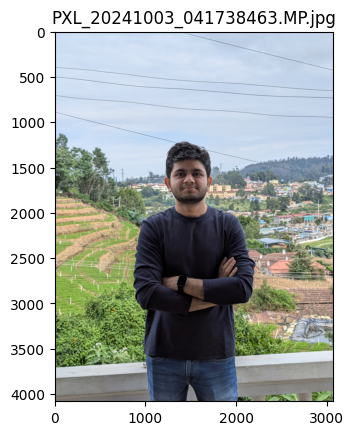

In [67]:
# Step 3: Query similar images
query_image_name = "PXL_20241003_041738463.MP.jpg"
if query_image_name in minhashes:
    print(f"Querying similar images for {query_image_name}...")
    similar_images = query_similar_images(lsh, minhashes[query_image_name], query_image_name)
    print("Similar images found:", similar_images)
else:
    print(f"Image {query_image_name} not found in the dataset.")

# Optional: Visualize similar images
for similar_image in similar_images:
    img = cv2.imread(os.path.join(image_folder, similar_image))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(similar_image)
    plt.show()